# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

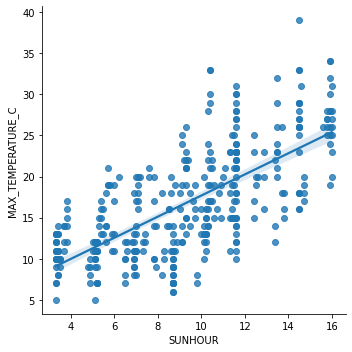

In [ ]:
# Your code here :
sns.lmplot(x="SUNHOUR", y="MAX_TEMPERATURE_C", data=df_weather);

## Train the model
You just have to read and execute the code below

In [ ]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [ ]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [ ]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]] 

*Why ? We'll see that in the next quest.*

In [ ]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
df_weather["predict"] = modelLR.predict(df_weather[['SUNHOUR']])

## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it. 

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

In [ ]:
# Your code here :
trace1 = go.Scatter(
    
    x=df_weather["SUNHOUR"],
    y=df_weather["MAX_TEMPERATURE_C"],
        mode='markers',
        name = "Température maximum relevée"
)
trace2 = go.Scatter(
    x=df_weather["SUNHOUR"],
    y=df_weather["predict"],
    mode='markers',
    marker=dict(color='rgb(254,92,92)'),
    name = "Prédiction"

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)


fig.update_layout(height = 600, width = 800, title = "Température maximum et prédiction", title_x=0.2)
fig.update_yaxes(range=[0, 40], title="Température en °C", side="left")
fig.update_xaxes(title="Heures ensoleillées")
fig.show()

Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

In [ ]:
# Your code here :
trace1 = go.Scatter(
    
    x=df_weather["DATE"],
    y=df_weather["MAX_TEMPERATURE_C"],
        mode='markers',
        name = "Température maximum relevée"
)
trace2 = go.Scatter(
    x=df_weather["DATE"],
    y=df_weather["predict"],
    mode='markers',
    marker=dict(color='rgb(254,92,92)'),
    name = "Prédiction"

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)


fig.update_layout(height = 600, width = 800, title = "Température maximum et prédiction", title_x=0.2)
fig.update_yaxes(range=[0, 40], title="Température en °C", side="left")
fig.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

In [ ]:
# Your code here :
X = df_weather[['MIN_TEMPERATURE_C']] 
y = df_weather['MAX_TEMPERATURE_C'] 

minTempModel = LinearRegression().fit(X,y)

df_weather["predict2"] = minTempModel.predict(df_weather[['MIN_TEMPERATURE_C']])

## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

In [ ]:
#Your code here :
trace1 = go.Scatter(
    
    x=df_weather["MIN_TEMPERATURE_C"],
    y=df_weather["MAX_TEMPERATURE_C"],
        mode='markers',
        name = "Température minimum relevée"
)
trace2 = go.Scatter(
    x=df_weather["MIN_TEMPERATURE_C"],
    y=df_weather["predict2"],
    mode='markers',
    marker=dict(color='rgb(254,92,92)'),
    name = "Prédiction"

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)


fig.update_layout(height = 600, width = 800, title = "Température minimum et prédiction de la température maximum")
fig.update_yaxes(range=[0, 40], title="Température en °C", side="left")
fig.update_xaxes(title="Température minimimum en °C")
fig.show()

## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

In [ ]:
#Your code here :
trace1 = go.Scatter(
    
    x=df_weather["DATE"],
    y=df_weather["MAX_TEMPERATURE_C"],
        mode='markers',
        name = "Température maximum relevée"
)
trace2 = go.Scatter(
    x=df_weather["DATE"],
    y=df_weather["predict2"],
    mode='markers',
    marker=dict(color='rgb(254,92,92)'),
    name = "Prédiction"

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)


fig.update_layout(height = 600, width = 800, title = "Température maximum relevée et prédiction de la température maximum")
fig.update_yaxes(range=[0, 40], title="Température en °C", side="left")
fig.show()